<a href="https://colab.research.google.com/github/IndraMadika/ML_Study/blob/main/Image%20Classification/Until%20Test%20Prediction%201%20optimizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d indragenn/fruit-dataset-for-classification

 90% 102M/113M [00:01<00:00, 97.5MB/s] 
100% 113M/113M [00:01<00:00, 75.9MB/s]


In [8]:
import zipfile
local_dataset_zip = '/content/fruit-dataset-for-classification.zip'
zip_buka = zipfile.ZipFile(local_dataset_zip, 'r')
zip_buka.extractall('/content')
zip_buka.close()


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [10]:
TRAIN_PATH = '/content/Dataset/Train'
TEST_PATH = '/content/Dataset/Test'
SIZE = (150, 150)

In [11]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['Rotten_Lemon', 'Fresh_Lime', 'Fresh_Strawberry', 'Rotten_Mango', 'Fresh_Mango', 'Rotten_Lime', 'Fresh_Guava', 'Fresh_Lemon', 'Rotten_Strawberry', 'Rotten Guava']


In [12]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255) 

'''
Comments:
- ImageDataGenerator will resize all images to target_size
- x_col is the column where the images' names are
- y_col is the column where the labels are
- has_ext means that the images' names include a file extension, e.g. image_name.jpg
- Here you can change the targe_size to resize all images to different shapes.
Maybe larger images help in getting a better accuracy
'''
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                 classes=labels,
                                                 target_size=SIZE, 
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                 classes=labels,
                                                 target_size=SIZE, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 8516 images belonging to 10 classes.
Found 944 images belonging to 10 classes.


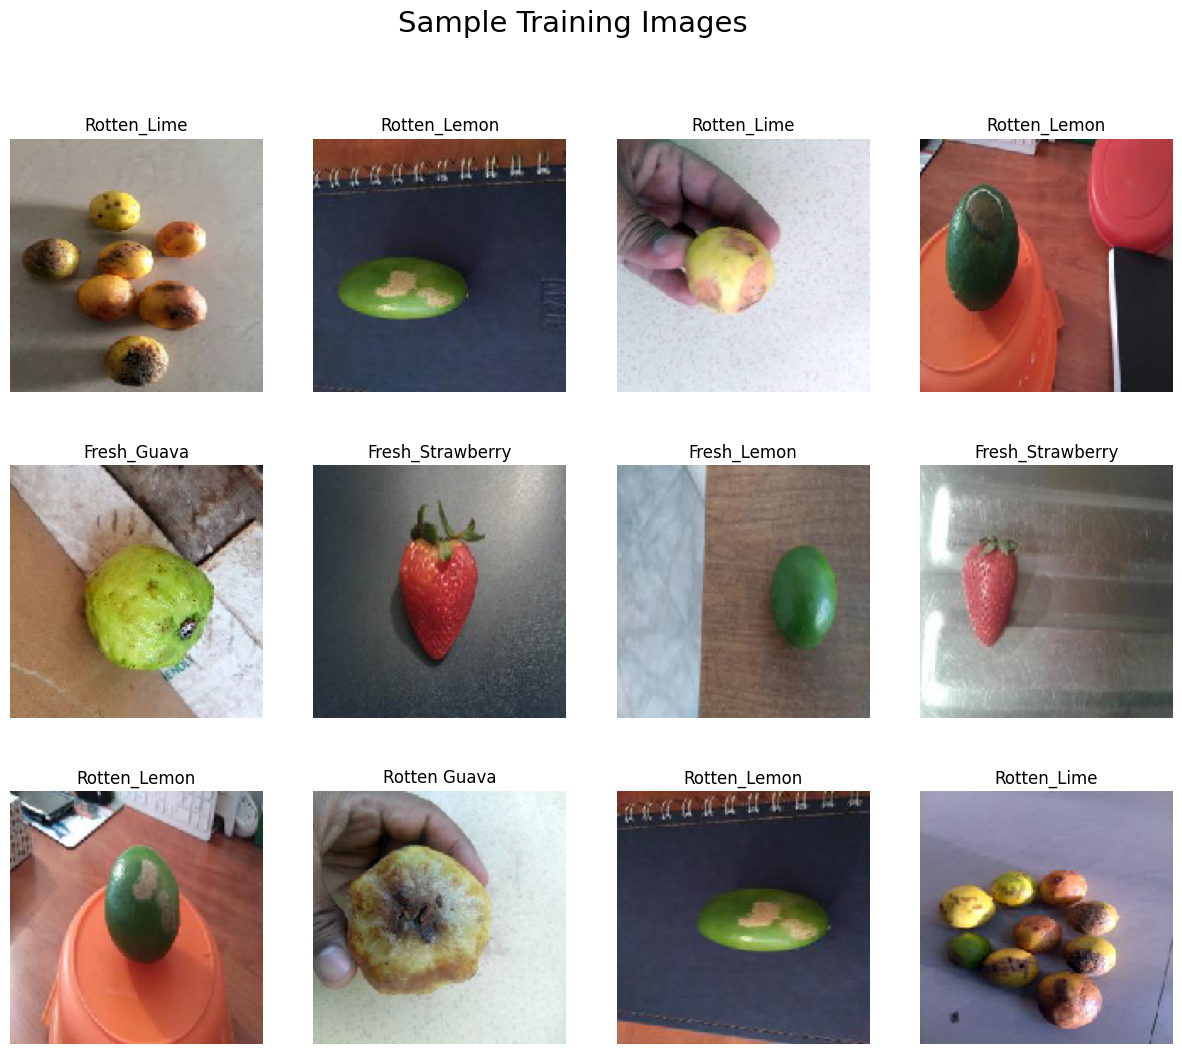

In [13]:

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(10, activation='sigmoid')  
])
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=3)


Epoch 1/3
267/267 [==============================] - 273s 1s/step - loss: 0.8359 - accuracy: 0.7049 - val_loss: 2.6989 - val_accuracy: 0.5328
Epoch 2/3
267/267 [==============================] - 265s 994ms/step - loss: 0.1999 - accuracy: 0.9349 - val_loss: 1.9643 - val_accuracy: 0.6589
Epoch 3/3
267/267 [==============================] - 261s 979ms/step - loss: 0.0811 - accuracy: 0.9749 - val_loss: 3.4377 - val_accuracy: 0.6917


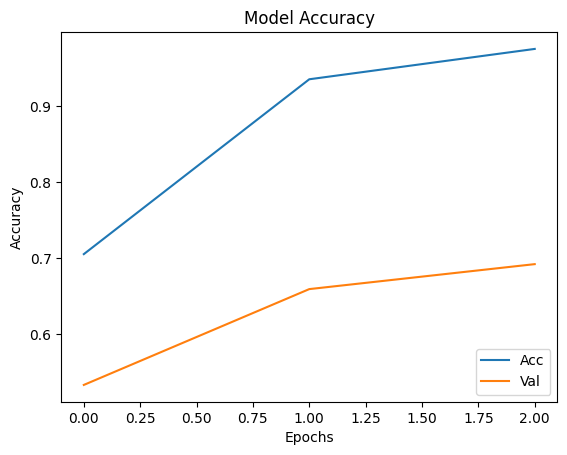

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

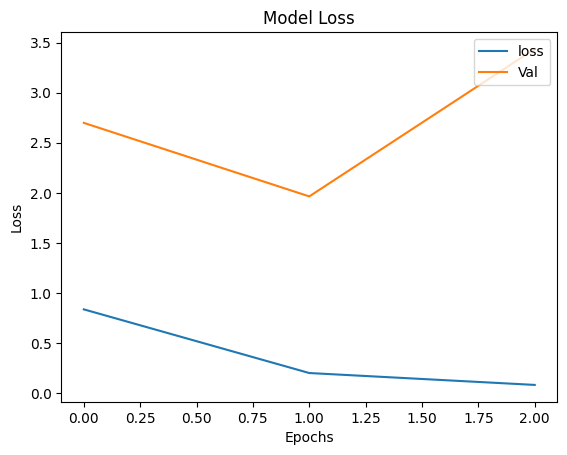

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 1000 images belonging to 10 classes.
1000/1000 [==============================] - 18s 18ms/step - loss: 0.1986 - accuracy: 0.9250
accuracy test:  0.925000011920929
loss test:  0.19859306514263153


In [19]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]    
    prob=p[index]
#     print('for file ', files[i], ' predicted class is ', klass,' with probability ',prob)

1000/1000 [==============================] - 16s 16ms/step


In [20]:
print(len(test_generator[0][0]))
print(test_generator[0][1].shape)

1
(1, 10)


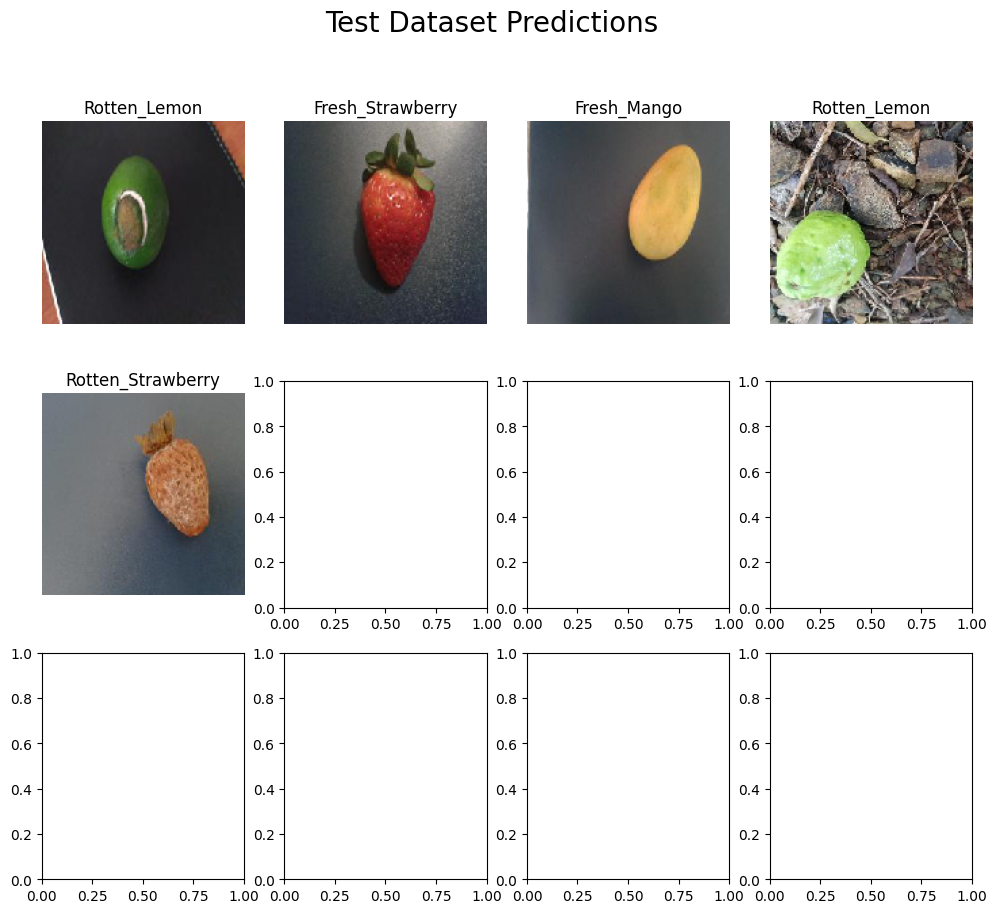

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(4):
        if idx >= len(predictions):
            break
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[idx][0].reshape(150,150,3))
        ax[i, j].axis("off")
        idx += 200

# plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()


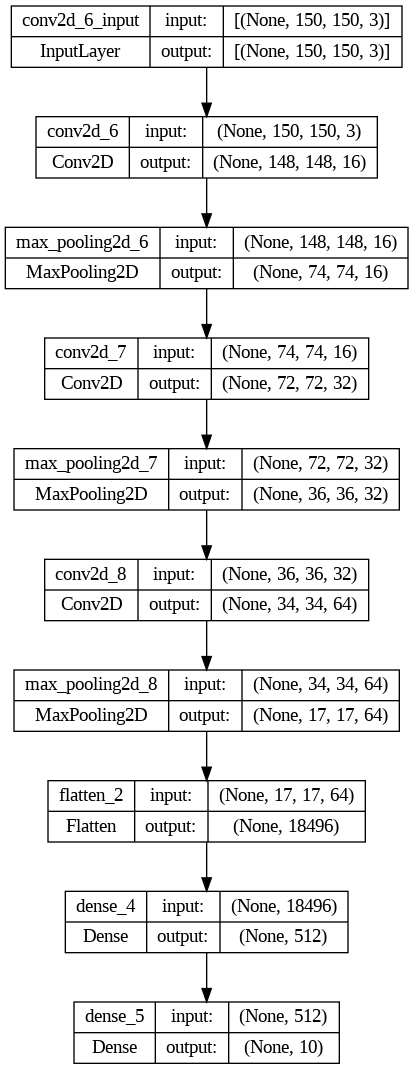

In [24]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=True, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [25]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 13.6 MB/s eta 0:00:00


In [26]:
from tensorflow.keras import layers
from collections import defaultdict
# from PIL import ImageFont
# font = ImageFont.truetype("arial.ttf", 12)
color_map = defaultdict(dict) #customize the colours
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
# visualkeras.layered_view(model, legend=True,color_map=color_map,scale_xy=2, scale_z=1, max_z=200)

In [27]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

<ipython-input-27-e10bbc112ad2>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


In [28]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [29]:
print(true_classes)
print(class_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

                   precision    recall  f1-score   support

     Rotten_Lemon       0.63      0.96      0.76       100
       Fresh_Lime       0.96      0.98      0.97       100
 Fresh_Strawberry       0.96      0.97      0.97       100
     Rotten_Mango       0.93      0.85      0.89       100
      Fresh_Mango       0.91      0.85      0.88       100
      Rotten_Lime       0.93      0.90      0.91       100
      Fresh_Guava       0.96      0.68      0.80       100
      Fresh_Lemon       0.94      0.82      0.88       100
Rotten_Strawberry       0.86      0.90      0.88       100
     Rotten Guava       0.90      0.91      0.91       100

         accuracy                           0.88      1000
        macro avg       0.90      0.88      0.88      1000
     weighted avg       0.90      0.88      0.88      1000



In [31]:
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, predicted_classes))
cm = confusion_matrix(test_generator.classes, predicted_classes)

Confusion Matrix
[[96  0  0  0  0  0  0  4  0  0]
 [ 0 98  0  0  0  0  2  0  0  0]
 [ 0  0 97  1  0  0  0  0  2  0]
 [ 0  0  0 85  6  1  0  0  8  0]
 [ 8  0  3  2 85  0  0  1  1  0]
 [ 0  0  0  0  0 90  0  0  0 10]
 [27  4  0  0  0  1 68  0  0  0]
 [18  0  0  0  0  0  0 82  0  0]
 [ 3  0  1  3  2  1  0  0 90  0]
 [ 0  0  0  0  0  4  1  0  4 91]]


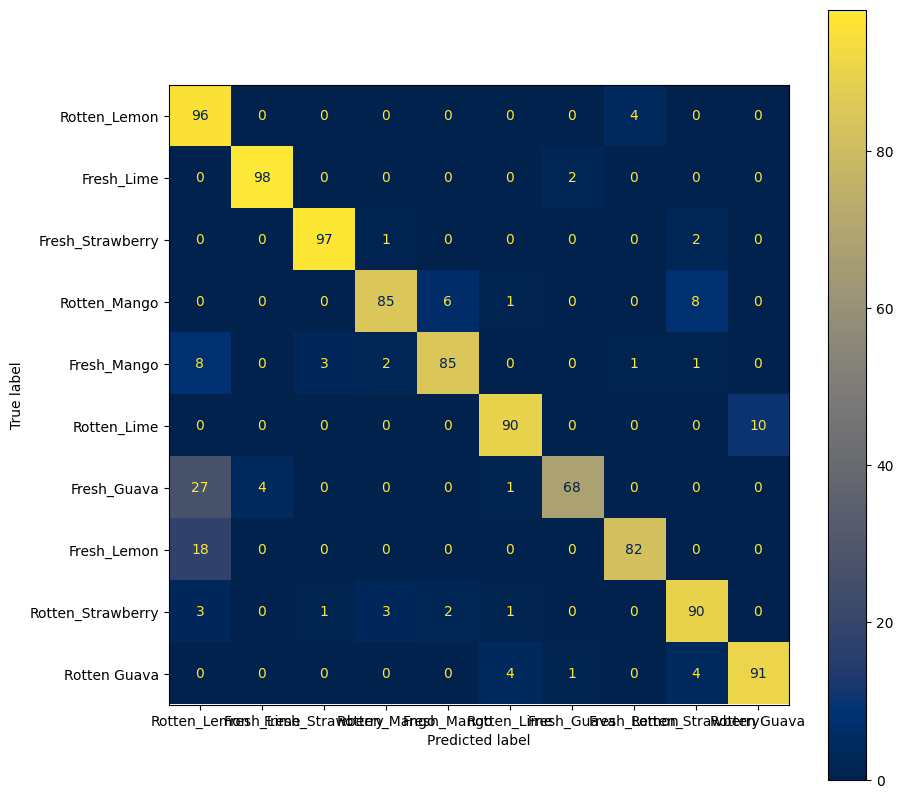

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_generator.classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="cividis")